In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [3]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,526740,0,0,kuyori,237,228,1,0.5,"November 1, 2022","Uh, so is it just like, doing some 'jobs' caus..."
1,526740,0,0,carmiee,142,14,-1,1.1,"November 1, 2022",Meh.
2,526740,0,0,76561199114010892,20,3,1,4.3,"October 7, 2022","Although the game is not long, but i liked it ..."
3,526740,1,1,ETD_Nero,172,47,-1,1.0,"July 5, 2022",This is actually one of the worst experiences ...
4,526740,0,0,76561197964933785,63,4,-1,0.2,"May 31, 2022",I would REALLY like to give this game a thumbs...


In [4]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [5]:
# clean up uneeded columns
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [6]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,0,0,1,0.5,"November 1, 2022","Uh, so is it just like, doing some 'jobs' caus..."
1,0,0,-1,1.1,"November 1, 2022",Meh.
2,0,0,1,4.3,"October 7, 2022","Although the game is not long, but i liked it ..."
3,1,1,-1,1.0,"July 5, 2022",This is actually one of the worst experiences ...
4,0,0,-1,0.2,"May 31, 2022",I would REALLY like to give this game a thumbs...


In [7]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [8]:
# organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"November 1, 2022","Uh, so is it just like, doing some 'jobs' caus...",0,0,0.5,1
1,"November 1, 2022",Meh.,0,0,1.1,-1
2,"October 7, 2022","Although the game is not long, but i liked it ...",0,0,4.3,1
3,"July 5, 2022",This is actually one of the worst experiences ...,1,1,1.0,-1
4,"May 31, 2022",I would REALLY like to give this game a thumbs...,0,0,0.2,-1
5,"March 18, 2022",eh,0,0,25.5,-1
6,"February 17, 2022",hack me hack you.,0,0,4.2,1
7,"February 1, 2022",Hack Me is the beginning of a hack simulator g...,6,0,12.1,-1
8,"January 2, 2022","It's really good, something like you acting li...",0,0,1.3,1
9,"December 28, 2020",Awfully bad simulator. Only the very exact com...,1,0,0.7,-1


In [9]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [10]:
import datetime as dt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  372 non-null    object 
 1   Review_Text     372 non-null    object 
 2   Num_Helpful     372 non-null    int64  
 3   Num_Funny       372 non-null    int64  
 4   Hours_Played    372 non-null    float64
 5   Recommend       372 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 17.6+ KB


In [12]:
# change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_23036/3723366679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"November 1, 2022","Uh, so is it just like, doing some 'jobs' caus...",0,0,0.5,1,1667260800
1,"November 1, 2022",Meh.,0,0,1.1,-1,1667260800
2,"October 7, 2022","Although the game is not long, but i liked it ...",0,0,4.3,1,1665100800
3,"July 5, 2022",This is actually one of the worst experiences ...,1,1,1.0,-1,1656979200
4,"May 31, 2022",I would REALLY like to give this game a thumbs...,0,0,0.2,-1,1653955200


In [13]:
# change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_23036/3335926905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 1, 2022","Uh, so is it just like, doing some 'jobs' caus...",0,0,0.5,1,1667260800,2756
1,"November 1, 2022",Meh.,0,0,1.1,-1,1667260800,2756
2,"October 7, 2022","Although the game is not long, but i liked it ...",0,0,4.3,1,1665100800,2753
3,"July 5, 2022",This is actually one of the worst experiences ...,1,1,1.0,-1,1656979200,2739
4,"May 31, 2022",I would REALLY like to give this game a thumbs...,0,0,0.2,-1,1653955200,2734


In [14]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 1, 2022","Uh, so is it just like, doing some 'jobs' caus...",0,0,0.5,1,1667260800,2756
1,"November 1, 2022",Meh.,0,0,1.1,-1,1667260800,2756
2,"October 7, 2022","Although the game is not long, but i liked it ...",0,0,4.3,1,1665100800,2753
3,"July 5, 2022",This is actually one of the worst experiences ...,1,1,1.0,-1,1656979200,2739
4,"May 31, 2022",I would REALLY like to give this game a thumbs...,0,0,0.2,-1,1653955200,2734


## - Data Aggregation -

### Number of text reviews per day:

In [15]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
# df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2756,"November 1, 2022","Uh, so is it just like, doing some 'jobs' caus..."
1,2756,"November 1, 2022",Meh.
2,2753,"October 7, 2022","Although the game is not long, but i liked it ..."
3,2739,"July 5, 2022",This is actually one of the worst experiences ...
4,2734,"May 31, 2022",I would REALLY like to give this game a thumbs...


In [16]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2443,"November 2, 2016",8
1,2444,"November 3, 2016",10
2,2444,"November 4, 2016",15
3,2444,"November 5, 2016",2
4,2444,"November 6, 2016",6
...,...,...,...
193,2724,"March 18, 2022",1
194,2734,"May 31, 2022",1
195,2739,"July 5, 2022",1
196,2753,"October 7, 2022",1


<AxesSubplot:>

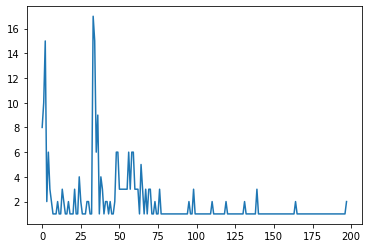

In [17]:
text_days['review_count'].plot()

In [18]:
# total number of text reviews
text_days['review_count'].sum()

372

In [19]:
# average number of text reviews per day
text_days['review_count'].mean()

1.878787878787879

### Number of text reviews per week:

In [20]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2443,8
1,2444,39
2,2445,4
3,2446,1
4,2447,7
...,...,...
102,2724,1
103,2734,1
104,2739,1
105,2753,1


<AxesSubplot:>

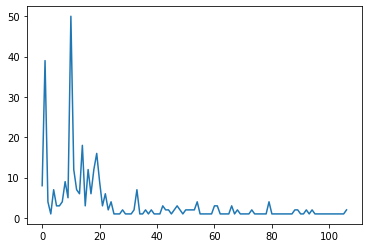

In [21]:
text_weeks['review_count'].plot()

In [22]:
# total number of text reviews
text_weeks['review_count'].sum()

372

In [23]:
# average number of text reviews per week
text_weeks['review_count'].mean()

3.4766355140186915

### Num_Helpful per week:

In [24]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 1, 2022","Uh, so is it just like, doing some 'jobs' caus...",0,0,0.5,1,1667260800,2756
1,"November 1, 2022",Meh.,0,0,1.1,-1,1667260800,2756
2,"October 7, 2022","Although the game is not long, but i liked it ...",0,0,4.3,1,1665100800,2753
3,"July 5, 2022",This is actually one of the worst experiences ...,1,1,1.0,-1,1656979200,2739
4,"May 31, 2022",I would REALLY like to give this game a thumbs...,0,0,0.2,-1,1653955200,2734


In [25]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2443,24
1,2444,137
2,2445,11
3,2446,3
4,2447,39
...,...,...
102,2724,0
103,2734,0
104,2739,1
105,2753,0


In [26]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2443,8,0,2.0,3.000000
2444,26,0,0.0,3.512821
2445,8,0,1.5,2.750000
2446,3,3,3.0,3.000000
2447,36,0,0.0,5.571429
...,...,...,...,...
2724,0,0,0.0,0.000000
2734,0,0,0.0,0.000000
2739,1,1,1.0,1.000000


In [27]:
# total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

1235

In [28]:
# average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

3.3198924731182795

### Num_Funny per week:

In [29]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})

,Date_Epoch_Week,Num_Funny
0,2443,28
1,2444,9
2,2445,5
3,2446,0
4,2447,84
...,...,...
102,2724,0
103,2734,0
104,2739,1
105,2753,0


In [30]:
df_funny.groupby('Date_Epoch_Week').Num_Funny.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2443,8,0,3.0,3.500000
2444,2,0,0.0,0.230769
2445,5,0,0.0,1.250000
2446,0,0,0.0,0.000000
2447,81,0,0.0,12.000000
...,...,...,...,...
2724,0,0,0.0,0.000000
2734,0,0,0.0,0.000000
2739,1,1,1.0,1.000000


In [31]:
# total number of funny votes of all users for all text reviews combined
df_funny['Num_Funny'].sum()

291

In [32]:
# average number of funny votes on all reviews by all users
df_funny['Num_Funny'].mean()

0.782258064516129

### Hours_Played per week:

In [33]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2443,28.4
1,2444,51.4
2,2445,3.8
3,2446,186.0
4,2447,8.0
...,...,...
102,2724,25.5
103,2734,0.2
104,2739,1.0
105,2753,4.3


In [34]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2443,4.1,2.8,3.65,3.550000
2444,5.7,0.1,0.70,1.317949
2445,2.1,0.5,0.60,0.950000
2446,186.0,186.0,186.00,186.000000
2447,3.3,0.2,0.60,1.142857
...,...,...,...,...
2724,25.5,25.5,25.50,25.500000
2734,0.2,0.2,0.20,0.200000
2739,1.0,1.0,1.00,1.000000


In [35]:
# total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

3937.999999999999

In [36]:
# average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

10.586021505376342

### Recommend per week:

In [37]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# avgerage number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2443,1.000000
1,2444,-0.025641
2,2445,0.000000
3,2446,1.000000
4,2447,0.142857
...,...,...
102,2724,-1.000000
103,2734,-1.000000
104,2739,-1.000000
105,2753,1.000000


In [38]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2443,1,1,1.0,1.000000
2444,1,-1,-1.0,-0.025641
2445,1,-1,0.0,0.000000
2446,1,1,1.0,1.000000
2447,1,-1,1.0,0.142857
...,...,...,...,...
2724,-1,-1,-1.0,-1.000000
2734,-1,-1,-1.0,-1.000000
2739,-1,-1,-1.0,-1.000000


In [39]:
# total number of users who recommend the game
df_recmd['Recommend'].sum()

-92

In [40]:
# average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

-0.24731182795698925

## Feature Scaling - Min-Max Normalization

In [41]:
df_min_max_scaled = df.copy()

In [42]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 1, 2022","Uh, so is it just like, doing some 'jobs' caus...",0,0,0.5,1,1667260800,2756
1,"November 1, 2022",Meh.,0,0,1.1,-1,1667260800,2756
2,"October 7, 2022","Although the game is not long, but i liked it ...",0,0,4.3,1,1665100800,2753
3,"July 5, 2022",This is actually one of the worst experiences ...,1,1,1.0,-1,1656979200,2739
4,"May 31, 2022",I would REALLY like to give this game a thumbs...,0,0,0.2,-1,1653955200,2734


In [43]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 1, 2022","Uh, so is it just like, doing some 'jobs' caus...",0,0,0.000413,1.0,1.000000,2756
1,"November 1, 2022",Meh.,0,0,0.001032,0.0,1.000000,2756
2,"October 7, 2022","Although the game is not long, but i liked it ...",0,0,0.004336,1.0,0.988584,2753
3,"July 5, 2022",This is actually one of the worst experiences ...,1,1,0.000929,0.0,0.945662,2739
4,"May 31, 2022",I would REALLY like to give this game a thumbs...,0,0,0.000103,0.0,0.929680,2734
...,...,...,...,...,...,...,...,...
367,"February 3, 2017","Game is not horrible bad,but in the tutorial u...",3,0,0.005059,0.0,0.042466,2457
368,"February 2, 2017",Don't waste your money on it. The whole game's...,7,0,0.002581,0.0,0.042009,2457
369,"February 2, 2017",The game has a few things in there that seem t...,0,0,0.003820,1.0,0.042009,2457
370,"January 26, 2017","All promise, no punchOverall the game attempts...",4,0,0.003097,0.0,0.038813,2456


In [44]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [45]:
pd.set_option('display.max_rows', None)

In [46]:
df_sorted = df_sorted.reset_index(drop=True)

In [47]:
# drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
# delete Chinese characters in text reviews
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_23036/2491715762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [49]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"November 1, 2022","Uh, so is it just like, doing some 'jobs' caus...",0,0,0.000413,1.0,1.000000,2756
1,"November 1, 2022",Meh.,0,0,0.001032,0.0,1.000000,2756
2,"October 7, 2022","Although the game is not long, but i liked it ...",0,0,0.004336,1.0,0.988584,2753
3,"July 5, 2022",This is actually one of the worst experiences ...,1,1,0.000929,0.0,0.945662,2739
4,"May 31, 2022",I would REALLY like to give this game a thumbs...,0,0,0.000103,0.0,0.929680,2734
5,"March 18, 2022",eh,0,0,0.026223,0.0,0.895890,2724
6,"February 17, 2022",hack me hack you.,0,0,0.004233,1.0,0.882648,2720
7,"February 1, 2022",Hack Me is the beginning of a hack simulator g...,6,0,0.012389,0.0,0.875342,2717
8,"January 2, 2022","It's really good, something like you acting li...",0,0,0.001239,1.0,0.861644,2713
9,"December 28, 2020",Awfully bad simulator. Only the very exact com...,1,0,0.000619,0.0,0.692694,2660


In [50]:
# sorted review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [51]:
df_text_list

Date_Epoch_Week
2443    [Really cool! I was one of the first to buy it...
2444    [very cool game))),   :P, I cant seem to figur...
2445    [bin laden was not presentvery disappointed, T...
2446                                               [    ]
2447    [I had more issues trying to figure out this g...
2448    [>fhack_me! Why did i buy this game!?!, this g...
2449    [Very bad Game I played it for no time at all ...
2450    [This game has so many bugs and the grammer su...
2451    [one of the best hacker imulators iv ever play...
2452    [     ,      ,          zeroone,           500...
2453    [Need to dislike this game because it is so bo...
2454    [* Terribly broken english* Repetitive* Just.....
2455    [this game is so broken at the end of the turt...
2456    [All promise, no punchOverall the game attempt...
2457    [Poor. No intrustions or anything on what diff...
2458    [Really dissappointing linear straightforward ...
2459    [10/10 Would Hack Myself Again!, 10/10 Would H..

In [52]:
# storing data in JSON format
df_text_list.to_json('hackme_text.json', orient = 'split', compression = 'infer')

In [53]:
# reading the JSON file
game_text = pd.read_json('hackme_text.json')
print(game_text)

            name  index                                               data
0    Review_Text   2443  [Really cool! I was one of the first to buy it...
1    Review_Text   2444  [very cool game))),   :P, I cant seem to figur...
2    Review_Text   2445  [bin laden was not presentvery disappointed, T...
3    Review_Text   2446                                             [    ]
4    Review_Text   2447  [I had more issues trying to figure out this g...
5    Review_Text   2448  [>fhack_me! Why did i buy this game!?!, this g...
6    Review_Text   2449  [Very bad Game I played it for no time at all ...
7    Review_Text   2450  [This game has so many bugs and the grammer su...
8    Review_Text   2451  [one of the best hacker imulators iv ever play...
9    Review_Text   2452  [     ,      ,          zeroone,           500...
10   Review_Text   2453  [Need to dislike this game because it is so bo...
11   Review_Text   2454  [* Terribly broken english* Repetitive* Just.....
12   Review_Text   2455  

In [54]:
# mean of other columns; save as csv file
mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('hackme_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_23036/4233497564.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [55]:
mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
mean_day.to_csv('hackme_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_23036/565379638.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [56]:
# storing data in CSV format
game_review = df_sorted.to_csv('hackme_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])